In [521]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [522]:
data=pd.read_csv('/content/GAIL.csv')

In [523]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,GAIL,EQ,67.80,65.00,70.0,65.0,68.80,68.70,67.91,76055,5.165166e+11,NaN,NaN,NaN
1,2000-01-04,GAIL,EQ,68.70,69.85,72.9,66.0,67.00,66.35,67.29,98097,6.600457e+11,NaN,NaN,NaN
2,2000-01-05,GAIL,EQ,66.35,68.35,68.7,61.1,63.00,63.20,65.24,92690,6.046889e+11,NaN,NaN,NaN
3,2000-01-06,GAIL,EQ,63.20,64.80,67.0,63.0,64.75,64.95,65.55,173654,1.138299e+12,NaN,NaN,NaN
4,2000-01-07,GAIL,EQ,64.95,65.90,65.9,62.0,62.90,62.65,63.76,86590,5.521388e+11,NaN,NaN,NaN




*   Volume,Turnover,Trades are the metrics indicating trading activity
*   Prev Close, Open, High, Low, Last, Close: Stock price data.


*   Deliverable Volume, %Deliverble: Indicators of stock deliverability.





In [524]:
data.shape

(4985, 15)

 Analyze the indicators in the dataset that best explain the volatility and
 unpredictable nature of the stocks in the last decade.



*  Calculating volatility metrics:High-low % range,Daily Change %




In [525]:
data['Date']=pd.to_datetime(data['Date'])

In [526]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,GAIL,EQ,67.80,65.00,70.0,65.0,68.80,68.70,67.91,76055,5.165166e+11,NaN,NaN,NaN
1,2000-01-04,GAIL,EQ,68.70,69.85,72.9,66.0,67.00,66.35,67.29,98097,6.600457e+11,NaN,NaN,NaN
2,2000-01-05,GAIL,EQ,66.35,68.35,68.7,61.1,63.00,63.20,65.24,92690,6.046889e+11,NaN,NaN,NaN
3,2000-01-06,GAIL,EQ,63.20,64.80,67.0,63.0,64.75,64.95,65.55,173654,1.138299e+12,NaN,NaN,NaN
4,2000-01-07,GAIL,EQ,64.95,65.90,65.9,62.0,62.90,62.65,63.76,86590,5.521388e+11,NaN,NaN,NaN


In [527]:
data['High-Low Range %'] = ((data['High'] - data['Low']) / data['Low']) * 100


In [528]:
data['Daily Change %'] = ((data['Close'] - data['Prev Close']) / data['Prev Close']) * 100


* Daily Change %: Indicates the percentage change in stock price from the previous close to the current close.
*  High-Low Range %:Represents the daily range as a percentage of the closing price.
The average daily range is approximately 3.54%, with a standard deviation of 2.55%.
Maximum observed daily range is 93.56%, suggesting highly volatile days.





In [529]:
df=data.loc[:,'Prev Close':]

In [530]:
df.head()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %
0,67.80,65.00,70.0,65.0,68.80,68.70,67.91,76055,5.165166e+11,NaN,NaN,NaN,7.692308,1.327434
1,68.70,69.85,72.9,66.0,67.00,66.35,67.29,98097,6.600457e+11,NaN,NaN,NaN,10.454545,-3.420670
2,66.35,68.35,68.7,61.1,63.00,63.20,65.24,92690,6.046889e+11,NaN,NaN,NaN,12.438625,-4.747551
3,63.20,64.80,67.0,63.0,64.75,64.95,65.55,173654,1.138299e+12,NaN,NaN,NaN,6.349206,2.768987
4,64.95,65.90,65.9,62.0,62.90,62.65,63.76,86590,5.521388e+11,NaN,NaN,NaN,6.290323,-3.541186


In [531]:
new_df=data[(data['Date']>'2014-12-01')& (data['Date']<'2024-12-02')]#dataset of last decade

In [532]:
new_df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %
3398,2014-12-02,GAIL,EQ,478.40,475.30,484.00,461.50,465.75,463.75,472.50,1786363,8.440496e+13,34671.0,1105586.0,0.6189,4.875406,-3.062291
3399,2014-12-03,GAIL,EQ,463.75,463.75,473.80,461.00,471.60,472.25,469.22,938106,4.401809e+13,28241.0,453774.0,0.4837,2.776573,1.832884
3400,2014-12-04,GAIL,EQ,472.25,472.25,474.70,465.00,470.00,470.75,468.94,792752,3.717496e+13,24432.0,408123.0,0.5148,2.086022,-0.317628
3401,2014-12-05,GAIL,EQ,470.75,474.10,479.80,467.00,468.05,469.35,473.72,1206823,5.716967e+13,40714.0,674168.0,0.5586,2.740899,-0.297398
3402,2014-12-08,GAIL,EQ,469.35,468.95,472.95,465.35,467.00,466.75,467.55,673148,3.147331e+13,40252.0,426989.0,0.6343,1.633179,-0.553958


In [533]:
df=new_df.loc[:,'Prev Close':]

In [534]:
df.corr()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %
Prev Close,1.000000,0.998770,0.998287,0.998176,0.997780,0.997823,0.998211,-0.619720,-0.201113,-0.336498,-0.547957,0.529673,-0.232697,-0.028891
Open,0.998770,1.000000,0.999460,0.999466,0.998940,0.998987,0.999410,-0.620007,-0.202985,-0.337975,-0.550085,0.528618,-0.235820,0.002255
High,0.998287,0.999460,1.000000,0.999351,0.999563,0.999605,0.999795,-0.615804,-0.195877,-0.331686,-0.546897,0.522494,-0.221293,0.018469
Low,0.998176,0.999466,0.999351,1.000000,0.999496,0.999530,0.999755,-0.620954,-0.205584,-0.342218,-0.551997,0.528953,-0.249990,0.018623
Last,0.997780,0.998940,0.999563,0.999496,1.000000,0.999966,0.999785,-0.617521,-0.198842,-0.335804,-0.548930,0.524395,-0.234327,0.031348
Close,0.997823,0.998987,0.999605,0.999530,0.999966,1.000000,0.999833,-0.617942,-0.199538,-0.336200,-0.549401,0.524622,-0.234117,0.031185
VWAP,0.998211,0.999410,0.999795,0.999755,0.999785,0.999833,1.000000,-0.617779,-0.199532,-0.336206,-0.549228,0.524595,-0.234699,0.022765
Volume,-0.619720,-0.620007,-0.615804,-0.620954,-0.617521,-0.617942,-0.617779,1.000000,0.806404,0.746216,0.854233,-0.412743,0.389145,0.091361
Turnover,-0.201113,-0.202985,-0.195877,-0.205584,-0.198842,-0.199538,-0.199532,0.806404,1.000000,0.805130,0.768349,-0.165468,0.324857,0.089314
Trades,-0.336498,-0.337975,-0.331686,-0.342218,-0.335804,-0.336200,-0.336206,0.746216,0.805130,1.000000,0.710031,-0.198568,0.422951,0.049584


Correlation Analysis
High-Low Range %--



* Trades:Positive Correlation(0.4299) between High-low range(%) and Trades
*  Volume:Positive Correlation(0.389).Increase in Volume lead to increase in Trades.  

*  Turnover:Positive Correlation(0.324).Increase in Turnover lead to increase in High-Low Range
*  Deliverable%:Negative Correlation(-0.089) between Deliverable Volume and High ow Range%








Daily Change % (Price Change Volatility):
* Turnover:Positive correlation(-0.089) suggest a slight relationship between Turnover and Daily Change%.
* Trades: Positive correlation(-0.049) suggest a slight relationship between Turnover and Daily Change%.

* Volume:Positive Correlation(0.091) suggest a positive relationship
*  Deliverable Volume:Positive Correlation(-0.0004)suggest a positive relationship between Deliverable Volume and Daily Change%.
   

Insights

1.  Trades and Volume are critical indicators of intraday volatility.
2.  Turnover slightly affects price volatility but has a stronger impact on intraday volatility.
3.%Deliverable inversely correlates with both volatility measures, potentially indicating that stocks with more speculative trading (lower deliverability) are more volatile

In [535]:
data.isnull().sum()

,0
Date,0
Symbol,0
Series,0
Prev Close,0
Open,0
High,0
Low,0
Last,0
Close,0
VWAP,0


In [536]:
for col in data.columns:
  if data[col].dtype=='int64' or data[col].dtype=='float64':
    data[col]=data[col].fillna(data[col].mean())

In [537]:
data.isna().sum()

,0
Date,0
Symbol,0
Series,0
Prev Close,0
Open,0
High,0
Low,0
Last,0
Close,0
VWAP,0


#Choose promising stock based on your analysis for your portfolio

In [538]:
data

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %
0,2000-01-03,GAIL,EQ,67.80,65.00,70.00,65.00,68.80,68.70,67.91,76055,5.165166e+11,44548.929967,1.364708e+06,0.527357,7.692308,1.327434
1,2000-01-04,GAIL,EQ,68.70,69.85,72.90,66.00,67.00,66.35,67.29,98097,6.600457e+11,44548.929967,1.364708e+06,0.527357,10.454545,-3.420670
2,2000-01-05,GAIL,EQ,66.35,68.35,68.70,61.10,63.00,63.20,65.24,92690,6.046889e+11,44548.929967,1.364708e+06,0.527357,12.438625,-4.747551
3,2000-01-06,GAIL,EQ,63.20,64.80,67.00,63.00,64.75,64.95,65.55,173654,1.138299e+12,44548.929967,1.364708e+06,0.527357,6.349206,2.768987
4,2000-01-07,GAIL,EQ,64.95,65.90,65.90,62.00,62.90,62.65,63.76,86590,5.521388e+11,44548.929967,1.364708e+06,0.527357,6.290323,-3.541186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4980,2021-04-26,GAIL,EQ,129.40,130.70,132.00,129.75,129.90,130.00,130.30,6020366,7.844301e+13,25764.000000,1.797932e+06,0.298600,1.734104,0.463679
4981,2021-04-27,GAIL,EQ,130.00,130.00,132.80,130.00,132.00,131.55,131.77,11823364,1.557963e+14,63157.000000,4.634336e+06,0.392000,2.153846,1.192308
4982,2021-04-28,GAIL,EQ,131.55,132.50,134.00,132.00,133.00,133.35,133.15,6883321,9.165185e+13,30092.000000,1.535460e+06,0.223100,1.515152,1.368301
4983,2021-04-29,GAIL,EQ,133.35,134.70,136.40,133.30,134.75,134.80,134.71,9284829,1.250750e+14,35454.000000,3.062615e+06,0.329900,2.325581,1.087364


In [539]:
data.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'High-Low Range %', 'Daily Change %'],
      dtype='object')

In [540]:
# Calculate summary statistics by stock
stock_analysis = data.groupby('Symbol').agg({
    'Daily Change %': ['mean', 'std', lambda x: (x > 0).sum() / len(x)],  # Mean, Std Dev, and Positive Return Frequency
    'High-Low Range %': ['mean'],                                           # Mean volatility
    'Volume': ['mean'],                                                   # Mean trading volume
    '%Deliverble': ['mean'],                                              # Mean deliverable percentage
    'VWAP': ['mean']                                                      # Average VWAP
})

# Flatten column names
stock_analysis.columns = [
    'Mean Return (%)', 'Return Std Dev (%)', 'Positive Return Frequency',
    'Mean Volatility (%)', 'Mean Volume', 'Mean Deliverable (%)', 'Mean VWAP'
]

# Define thresholds or scores for the criteria
stock_analysis['Consistency Score'] = stock_analysis['Positive Return Frequency'] * 100  # Positive return frequency as a percentage
stock_analysis['Moderate Volatility Score'] = -abs(stock_analysis['Mean Volatility (%)'] - stock_analysis['Mean Volatility (%)'].median())
stock_analysis['High Volume Score'] = stock_analysis['Mean Volume'] / stock_analysis['Mean Volume'].max() * 100  # Volume as a percentage of the max volume
stock_analysis['Trend Score'] = stock_analysis['Mean Deliverable (%)'] + stock_analysis['Mean VWAP']  # Simplified trend measure

# Combine scores for overall ranking
stock_analysis['Overall Score'] = (
    stock_analysis['Consistency Score'] +
    stock_analysis['Moderate Volatility Score'] +
    stock_analysis['High Volume Score'] +
    stock_analysis['Trend Score']
)

# Rank stocks based on the overall score
stock_analysis['Rank'] = stock_analysis['Overall Score'].rank(ascending=False)

# Select the top stocks based on overall rank
top_consistent_stocks = stock_analysis.sort_values('Rank').head(5).reset_index()

# Display the top stocks
print(top_consistent_stocks[['Symbol', 'Mean Return (%)', 'Positive Return Frequency',
                             'Mean Volatility (%)', 'Mean Volume',
                             'Mean Deliverable (%)', 'Mean VWAP', 'Overall Score']])


  Symbol  Mean Return (%)  Positive Return Frequency  Mean Volatility (%)  \
0   GAIL         0.046855                   0.501103             3.663238   

    Mean Volume  Mean Deliverable (%)   Mean VWAP  Overall Score  
0  3.100069e+06              0.527357  292.335252      442.97294  


In [541]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %
0,2000-01-03,GAIL,EQ,67.80,65.00,70.0,65.0,68.80,68.70,67.91,76055,5.165166e+11,44548.929967,1.364708e+06,0.527357,7.692308,1.327434
1,2000-01-04,GAIL,EQ,68.70,69.85,72.9,66.0,67.00,66.35,67.29,98097,6.600457e+11,44548.929967,1.364708e+06,0.527357,10.454545,-3.420670
2,2000-01-05,GAIL,EQ,66.35,68.35,68.7,61.1,63.00,63.20,65.24,92690,6.046889e+11,44548.929967,1.364708e+06,0.527357,12.438625,-4.747551
3,2000-01-06,GAIL,EQ,63.20,64.80,67.0,63.0,64.75,64.95,65.55,173654,1.138299e+12,44548.929967,1.364708e+06,0.527357,6.349206,2.768987
4,2000-01-07,GAIL,EQ,64.95,65.90,65.9,62.0,62.90,62.65,63.76,86590,5.521388e+11,44548.929967,1.364708e+06,0.527357,6.290323,-3.541186


In [542]:
data

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %
0,2000-01-03,GAIL,EQ,67.80,65.00,70.00,65.00,68.80,68.70,67.91,76055,5.165166e+11,44548.929967,1.364708e+06,0.527357,7.692308,1.327434
1,2000-01-04,GAIL,EQ,68.70,69.85,72.90,66.00,67.00,66.35,67.29,98097,6.600457e+11,44548.929967,1.364708e+06,0.527357,10.454545,-3.420670
2,2000-01-05,GAIL,EQ,66.35,68.35,68.70,61.10,63.00,63.20,65.24,92690,6.046889e+11,44548.929967,1.364708e+06,0.527357,12.438625,-4.747551
3,2000-01-06,GAIL,EQ,63.20,64.80,67.00,63.00,64.75,64.95,65.55,173654,1.138299e+12,44548.929967,1.364708e+06,0.527357,6.349206,2.768987
4,2000-01-07,GAIL,EQ,64.95,65.90,65.90,62.00,62.90,62.65,63.76,86590,5.521388e+11,44548.929967,1.364708e+06,0.527357,6.290323,-3.541186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4980,2021-04-26,GAIL,EQ,129.40,130.70,132.00,129.75,129.90,130.00,130.30,6020366,7.844301e+13,25764.000000,1.797932e+06,0.298600,1.734104,0.463679
4981,2021-04-27,GAIL,EQ,130.00,130.00,132.80,130.00,132.00,131.55,131.77,11823364,1.557963e+14,63157.000000,4.634336e+06,0.392000,2.153846,1.192308
4982,2021-04-28,GAIL,EQ,131.55,132.50,134.00,132.00,133.00,133.35,133.15,6883321,9.165185e+13,30092.000000,1.535460e+06,0.223100,1.515152,1.368301
4983,2021-04-29,GAIL,EQ,133.35,134.70,136.40,133.30,134.75,134.80,134.71,9284829,1.250750e+14,35454.000000,3.062615e+06,0.329900,2.325581,1.087364


 Feature engineer and build machine learning solutions for the business
 Requirements

In [543]:
data['Cumulative_Return'] = data['Close'] / data['Close'].iloc[0] - 1  #cumilative returns over a period


In [544]:
data['Volume_Change'] = data['Volume'].pct_change()


In [545]:
#Moving averages
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()


In [546]:
data['Volatility'] = data['Daily Change %'].rolling(window=20).std()


In [547]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %,Cumulative_Return,Volume_Change,SMA_50,SMA_200,Volatility
0,2000-01-03,GAIL,EQ,67.80,65.00,70.0,65.0,68.80,68.70,67.91,...,44548.929967,1.364708e+06,0.527357,7.692308,1.327434,0.000000,NaN,NaN,NaN,NaN
1,2000-01-04,GAIL,EQ,68.70,69.85,72.9,66.0,67.00,66.35,67.29,...,44548.929967,1.364708e+06,0.527357,10.454545,-3.420670,-0.034207,0.289817,NaN,NaN,NaN
2,2000-01-05,GAIL,EQ,66.35,68.35,68.7,61.1,63.00,63.20,65.24,...,44548.929967,1.364708e+06,0.527357,12.438625,-4.747551,-0.080058,-0.055119,NaN,NaN,NaN
3,2000-01-06,GAIL,EQ,63.20,64.80,67.0,63.0,64.75,64.95,65.55,...,44548.929967,1.364708e+06,0.527357,6.349206,2.768987,-0.054585,0.873492,NaN,NaN,NaN
4,2000-01-07,GAIL,EQ,64.95,65.90,65.9,62.0,62.90,62.65,63.76,...,44548.929967,1.364708e+06,0.527357,6.290323,-3.541186,-0.088064,-0.501365,NaN,NaN,NaN


In [548]:
data['Target_Close'] = data['Close'].shift(-1)


In [549]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %,Cumulative_Return,Volume_Change,SMA_50,SMA_200,Volatility,Target_Close
0,2000-01-03,GAIL,EQ,67.80,65.00,70.0,65.0,68.80,68.70,67.91,...,1.364708e+06,0.527357,7.692308,1.327434,0.000000,NaN,NaN,NaN,NaN,66.35
1,2000-01-04,GAIL,EQ,68.70,69.85,72.9,66.0,67.00,66.35,67.29,...,1.364708e+06,0.527357,10.454545,-3.420670,-0.034207,0.289817,NaN,NaN,NaN,63.20
2,2000-01-05,GAIL,EQ,66.35,68.35,68.7,61.1,63.00,63.20,65.24,...,1.364708e+06,0.527357,12.438625,-4.747551,-0.080058,-0.055119,NaN,NaN,NaN,64.95
3,2000-01-06,GAIL,EQ,63.20,64.80,67.0,63.0,64.75,64.95,65.55,...,1.364708e+06,0.527357,6.349206,2.768987,-0.054585,0.873492,NaN,NaN,NaN,62.65
4,2000-01-07,GAIL,EQ,64.95,65.90,65.9,62.0,62.90,62.65,63.76,...,1.364708e+06,0.527357,6.290323,-3.541186,-0.088064,-0.501365,NaN,NaN,NaN,62.30


Mean Squared Error: 79.08474078317658
R2 Score: 0.9949963293911238


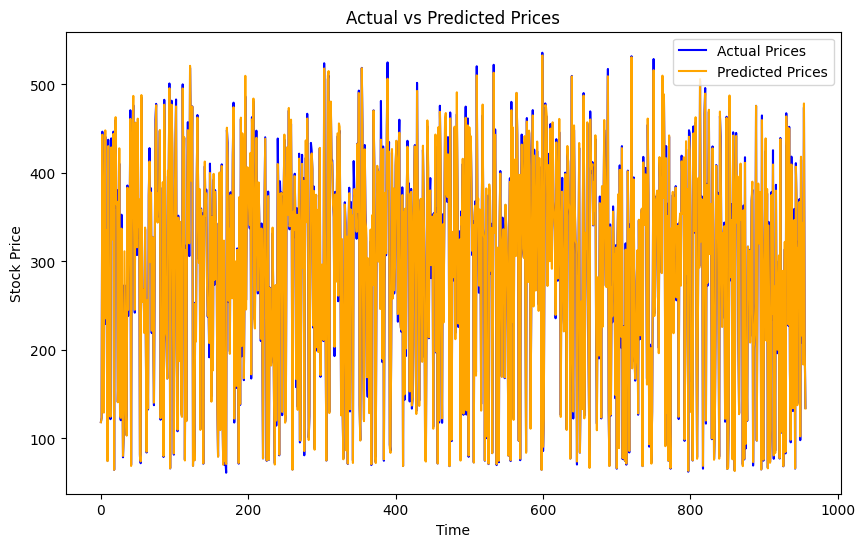

In [550]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Ensure the Date column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])


# Feature Engineering
data['Daily_Return'] = data['Close'].pct_change()
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['Volatility'] = data['Close'].rolling(window=20).std()

# Drop rows with NaN values generated from rolling calculations
data.dropna(inplace=True)
# Drop the last row with NaN target
data = data.dropna()

# Define Features (X) and Target (y)
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Daily_Return', 'SMA_20', 'SMA_50', 'Volatility']
X = data[features]
y = data['Target_Close']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make Predictions
y_pred = rf_model.predict(X_test)

# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

# Plot Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Actual Prices", color="blue")
plt.plot(y_pred, label="Predicted Prices", color="orange")
plt.title("Actual vs Predicted Prices")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


In [551]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,High-Low Range %,Daily Change %,Cumulative_Return,Volume_Change,SMA_50,SMA_200,Volatility,Target_Close,Daily_Return,SMA_20
199,2002-01-31,GAIL,EQ,66.75,68.00,68.50,67.00,68.0,68.05,68.01,...,2.238806,1.947566,-0.009461,0.068169,64.258,61.05800,1.505682,72.70,0.019476,66.3450
200,2002-02-01,GAIL,EQ,68.05,68.45,76.20,68.00,73.0,72.70,73.13,...,12.058824,6.833211,0.058224,5.574081,64.432,61.07800,2.037250,78.05,0.068332,66.7275
201,2002-02-04,GAIL,EQ,72.70,75.00,81.45,74.55,78.2,78.05,78.72,...,9.255533,7.359010,0.136099,0.803219,64.695,61.13650,3.204195,80.45,0.073590,67.3850
202,2002-02-05,GAIL,EQ,78.05,80.00,82.90,76.50,82.9,80.45,79.52,...,8.366013,3.074952,0.171033,-0.037274,65.012,61.22275,4.261745,87.10,0.030750,68.1800
203,2002-02-06,GAIL,EQ,80.45,85.90,96.00,84.40,86.5,87.10,89.45,...,13.744076,8.266004,0.267831,4.765901,65.462,61.33350,5.915744,79.80,0.082660,69.3050


In [552]:
features=['Date','Close']

In [553]:
my_data=data[features]

In [554]:
my_data['Date']=pd.to_datetime(my_data['Date'])

<ipython-input-554-1a6f73018fcd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_data['Date']=pd.to_datetime(my_data['Date'])


In [555]:
my_data

,Date,Close
199,2002-01-31,68.05
200,2002-02-01,72.70
201,2002-02-04,78.05
202,2002-02-05,80.45
203,2002-02-06,87.10
...,...,...
4979,2021-04-23,129.40
4980,2021-04-26,130.00
4981,2021-04-27,131.55
4982,2021-04-28,133.35


In [556]:
my_data.index=my_data['Date']

In [557]:
del my_data['Date']

<Axes: xlabel='Date'>

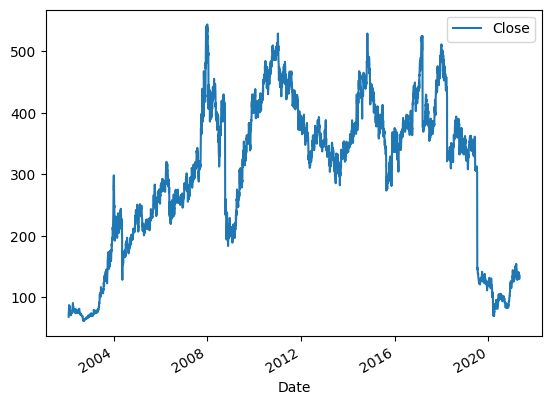

In [558]:
my_data.plot()

In [559]:
std_log=my_data.rolling(window=4).std()

In [560]:
mean_log=my_data.rolling(window=4).mean()

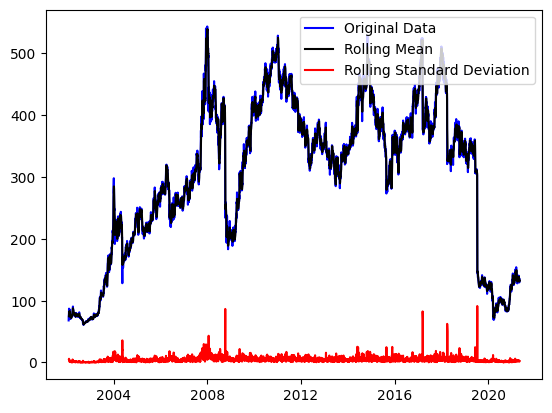

In [561]:
plt.plot(my_data,color='blue',label='Original Data')
plt.plot(mean_log,color='black',label='Rolling Mean')
plt.plot(std_log,color='red',label='Rolling Standard Deviation')
plt.legend(loc='best')

In [562]:
from statsmodels.tsa.stattools  import adfuller

In [563]:
#Augmented DickyFuller Test
result=adfuller(my_data['Close'])
keys=['test_statistics','p_value',"num_lags","num_observations","critical_values","AIC"]

In [564]:
for key,value in zip(keys,result):
  print(f"{key}:{value}")


test_statistics:-2.131163116798388
p_value:0.23216974700702037
num_lags:11
num_observations:4773
critical_values:{'1%': -3.431720798313939, '5%': -2.8621457382842417, '10%': -2.56709243631233}
AIC:33020.16815893608


In [565]:
import numpy as np

In [566]:
first_log=np.log(my_data)

In [567]:
first_log.dropna()

,Close
Date,
2002-01-31,4.220243
2002-02-01,4.286341
2002-02-04,4.357350
2002-02-05,4.387636
2002-02-06,4.467057
...,...
2021-04-23,4.862908
2021-04-26,4.867534
2021-04-27,4.879387


<Axes: xlabel='Date'>

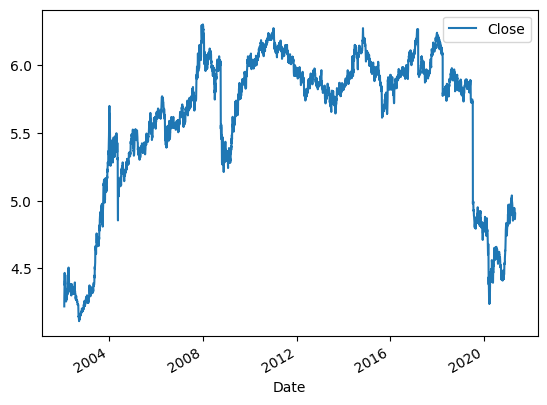

In [568]:
first_log.plot()

In [569]:
new_data=first_log-mean_log

Text(0.5, 1.0, 'Rolling mean and Standard deviation for log_scale data')

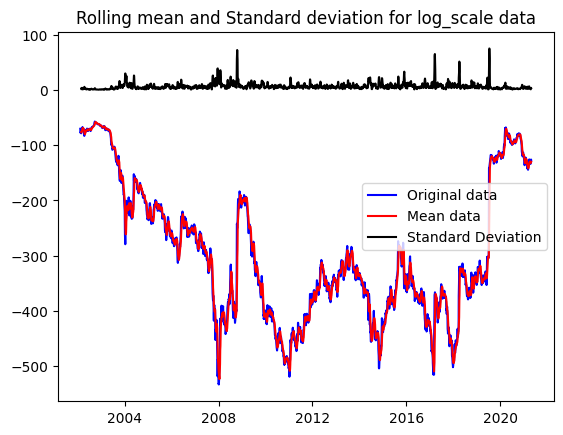

In [570]:
mean_log=new_data.rolling(window=12).mean()
std_log=new_data.rolling(window=12).std()

plt.plot(new_data,color='blue',label='Original data')
plt.plot(mean_log,color='red',label='Mean data')
plt.plot(std_log,color='black',label='Standard Deviation')

plt.legend(loc='best')
plt.title("Rolling mean and Standard deviation for log_scale data")

In [571]:
new_data

,Close
Date,
2002-01-31,NaN
2002-02-01,NaN
2002-02-04,NaN
2002-02-05,-70.424864
2002-02-06,-75.107943
...,...
2021-04-23,-128.437092
2021-04-26,-126.832466
2021-04-27,-126.108113


In [572]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

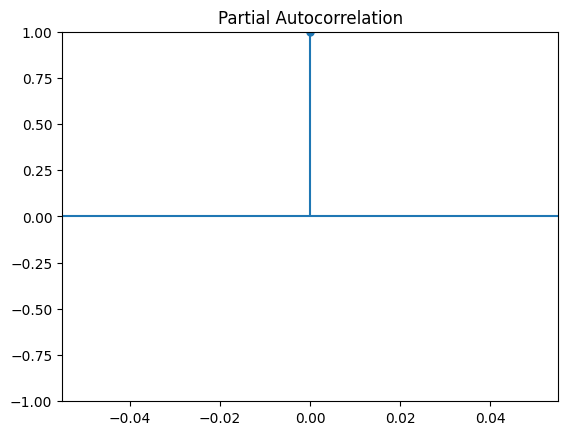

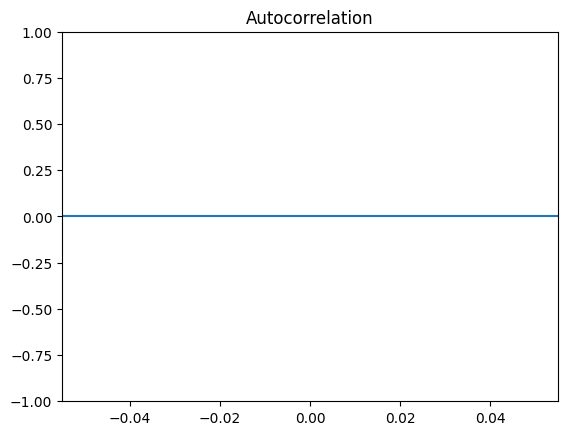

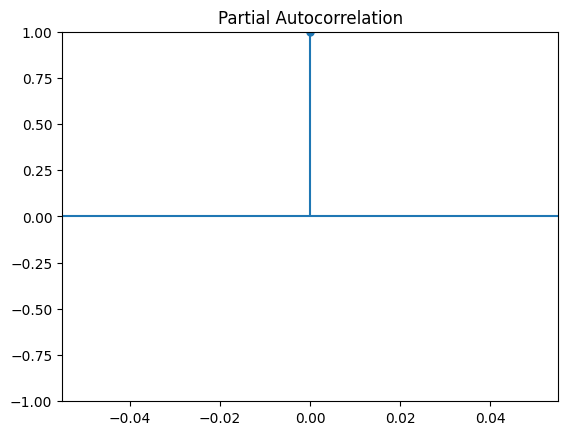

In [573]:
acf_values=acf(new_data)
plot_acf(new_data)
pacf_values=pacf(new_data,nlags=10)
plot_pacf(new_data)

In [574]:
from statsmodels.tsa.arima.model import ARIMA

In [575]:
train=new_df.iloc[:120]['Close']

In [576]:
test=new_df.iloc[120:]

In [577]:
model=ARIMA(train,order=(1,0,2))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [578]:
model_fit=model.fit()

In [579]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  120
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -408.206
Date:                Sat, 07 Dec 2024   AIC                            826.411
Time:                        09:11:40   BIC                            840.349
Sample:                             0   HQIC                           832.071
                                - 120                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        412.9477     17.001     24.289      0.000     379.626     446.269
ar.L1          0.9708      0.025     38.397      0.000       0.921       1.020
ma.L1         -0.0582      0.102     -0.573      0.5

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: xlabel='Date'>

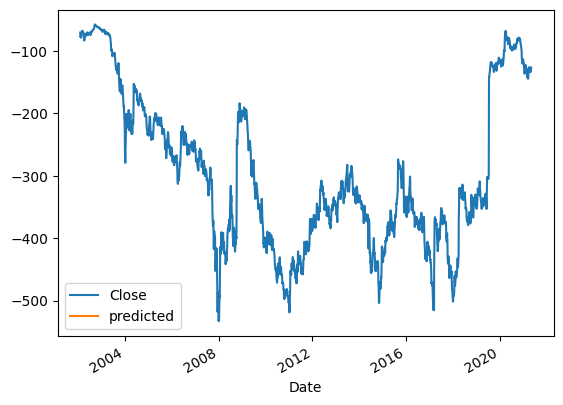

In [580]:
new_data['predicted']=model_fit.predict(start=len(train),end=len(train) + len(test)-1,dynamic=True)
new_data[['Close','predicted']].plot()

In [581]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [582]:
model=SARIMAX(train,order=(1,0,2),seasonal_order=(1,0,2,12))
model_fit=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: xlabel='Date'>

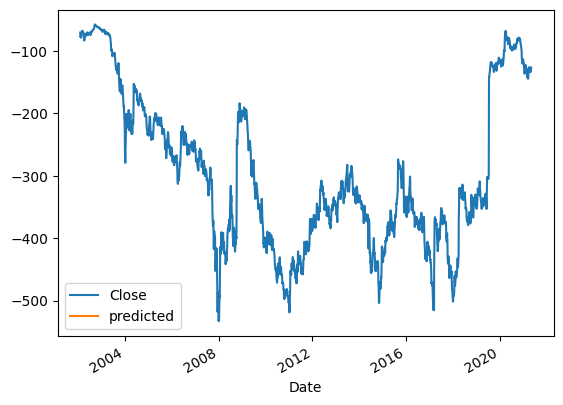

In [583]:
new_data['predicted']=model_fit.predict(start=len(train),end=len(train) + len(test)-1,dynamic=True)
new_data[['Close','predicted']].plot()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


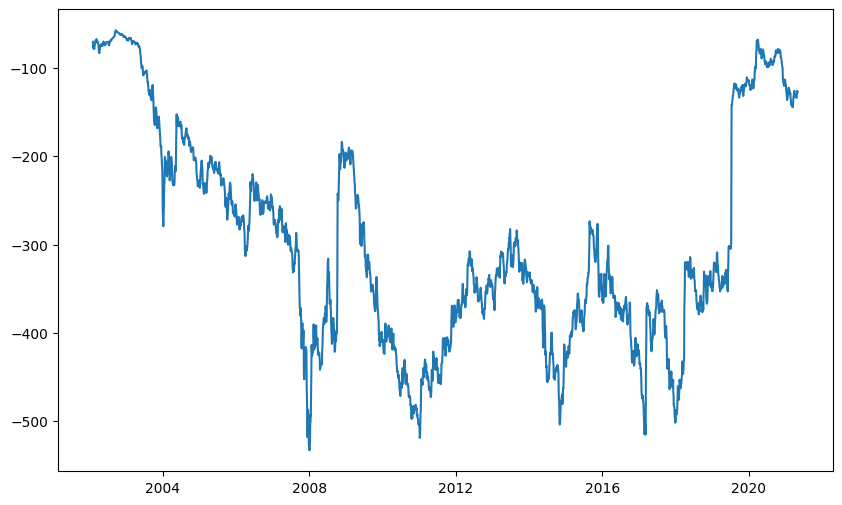

In [584]:
forecast=model_fit.forecast(steps=60)
plt.figure(figsize=(10,6))
plt.plot(new_data.index,new_data['Close'],label='Original Data')

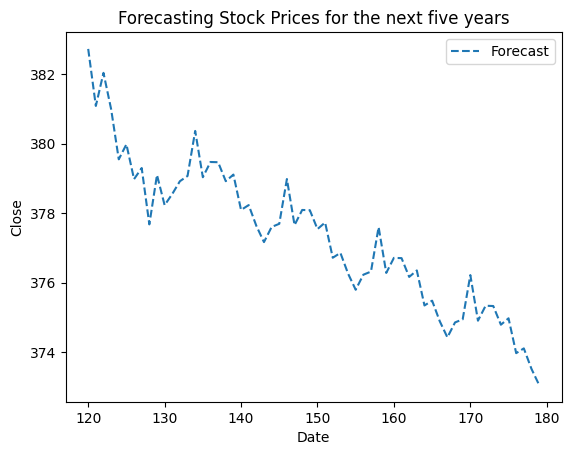

In [585]:
plt.plot(forecast.index,forecast,label='Forecast',linestyle='--')
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Forecasting Stock Prices for the next five years")
plt.legend()